### Getting Data from PostgreSQL DB

Prior to this we have successfull obtained our dataset from Kaggle and migrated it from a `sqlite` database to a `PostgreSQL` database. Now we can query from it using the `psycopg2` package.

#### Required Packages

In [167]:
import pandas as pd       # Data manipulation
import psycopg2           # Query against psql dbs
import numpy as np        # math and arrays
import matplotlib.pyplot as plt # plotting
import seaborn as sns     # Nicer plotting
import plotly_express as px # interactive plotting

#### Create Connection

We stored out data in a `PostgreSQL` database named `soccer`.

In [168]:
conn = psycopg2.connect("dbname=soccer")

---

---

### Set up queries

We will write queries for each of our proposed hypothesis tests.

#### 4) Impact of team dribbling on win percentage. 

In [169]:
query_4 = """
    /* Home Teams */
    select 
        country_name, league_name, team_short_name 
        ,team_long_name, season, stage, match_date
        ,home_team_goal
        ,away_team_goal
        ,team_dribble_rating
        ,team_dribble_scale
        ,'H' as home_or_away
    from
    (
    select
        c.name as country_name
        ,l.name as league_name
        ,ht.team_short_name 
        ,ht.team_long_name 
        ,m.season, m.stage, m.date as match_date, m.match_api_id
        ,m.home_team_goal
        ,m.away_team_goal
        ,hta.buildupplaydribbling as team_dribble_rating
        ,hta.buildupplaydribblingclass as team_dribble_scale
        ,row_number() over (partition by m.home_team_api_id, m.date
            order by to_date(hta.date, 'yyyy-mm-dd')) as enumer
    from
        match m
        inner join country c on m.country_id = c.id
        inner join league l on m.league_id = l.id
        inner join team ht on m.home_team_api_id = ht.team_api_id
        inner join team_attributes hta on hta.team_api_id = m.home_team_api_id
            and to_date(m.date, 'yyyy-mm-dd') 
                <= to_date(hta.date, 'yyyy-mm-dd') 
    ) ranked
    where 
        enumer = 1
        
    union all
    
    /* Away teams */
    select 
        country_name, league_name, team_short_name 
        ,team_long_name, season, stage, match_date
        ,home_team_goal
        ,away_team_goal
        ,team_dribble_rating
        ,team_dribble_scale
        ,'A' as home_or_away
    from
    (
    select
        c.name as country_name
        ,l.name as league_name
        ,at.team_short_name 
        ,at.team_long_name 
        ,m.season, m.stage, m.date as match_date, m.match_api_id
        ,m.home_team_goal
        ,m.away_team_goal
        ,ata.buildupplaydribbling as team_dribble_rating
        ,ata.buildupplaydribblingclass as team_dribble_scale
        ,row_number() over (partition by m.home_team_api_id, m.date
            order by to_date(ata.date, 'yyyy-mm-dd')) as enumer
    from
        match m
        inner join country c on m.country_id = c.id
        inner join league l on m.league_id = l.id
        inner join team at on m.away_team_api_id = at.team_api_id
        inner join team_attributes ata on ata.team_api_id = m.home_team_api_id
            and to_date(m.date, 'yyyy-mm-dd') 
                <= to_date(ata.date, 'yyyy-mm-dd') 
    ) ranked
    where 
        enumer = 1
;
"""

---

### Run queries, put contents into pandas DataFrame

In [170]:
cur = conn.cursor()
cur.execute(query_4)

In [171]:
soccer = pd.DataFrame(cur.fetchall())
soccer.columns = [desc[0] for desc in cur.description]

In [172]:
soccer.head(100).T

0                    1   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                  2                    3   
match_date           2008-08-16 00:00:00  2008-08-22 00:00:00   
home_team_goal                         2                    2   
away_team_goal                         1                    1   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      2                    3   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                  5                    7   
match_date           2008-09-12 00:00:00  2008-09-27 00:00:00   
home_team_goal                         2                    0   
away_team_goal                         0                    0   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      4                    5   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                  9                   12   
match_date           2008-10-19 00:00:00  2008-11-08 00:00:00   
home_team_goal                         2                    0   
away_team_goal                         0                    0   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      6                    7   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                 13                   15   
match_date           2008-11-11 00:00:00  2008-11-21 00:00:00   
home_team_goal                         1                    0   
away_team_goal                         2                    1   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      8                    9   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                 16                   18   
match_date           2008-11-29 00:00:00  2009-02-28 00:00:00   
home_team_goal                         1                    0   
away_team_goal                         0                    1   
team

In [173]:
soccer.describe()

stage  home_team_goal  away_team_goal  team_dribble_rating
count  45494.000000    45494.000000    45494.000000         12702.000000
mean      17.976480        1.546753        1.150481            48.979373
std       10.509355        1.295485        1.137656            10.021112
min        1.000000        0.000000        0.000000            24.000000
25%        9.000000        1.000000        0.000000            42.000000
50%       18.000000        1.000000        1.000000            49.000000
75%       27.000000        2.000000        2.000000            55.000000
max       38.000000       10.000000        8.000000            77.000000

---

In [174]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45494 entries, 0 to 45493
Data columns (total 12 columns):
country_name           45494 non-null object
league_name            45494 non-null object
team_short_name        45494 non-null object
team_long_name         45494 non-null object
season                 45494 non-null object
stage                  45494 non-null int64
match_date             45494 non-null object
home_team_goal         45494 non-null int64
away_team_goal         45494 non-null int64
team_dribble_rating    12702 non-null float64
team_dribble_scale     45494 non-null object
home_or_away           45494 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 4.2+ MB


So there appears to be many missing values for the `team_dribbling_rating`. Should we ignore the nulls? Or should we try to impute them? Let's explore them.

Let's look at `team_dribble_rating` vs `team_dribble_scale`

In [175]:
import plotly_express as px

In [176]:
px.parallel_categories(soccer.loc[:,['team_dribble_rating',
                                     'team_dribble_scale']],
                       color="team_dribble_rating", 
                       color_continuous_scale=px.colors.sequential.Inferno)

Super interesting! It looks like there are three categorical variables for scale: Little, Normal, and Lots. And if I had to guess, I would think all the `NaN` are bucketed into `Little`. Let's make sure.

In [177]:
little_dribbling = soccer.loc[soccer['team_dribble_scale']=='Little',:].copy()

In [178]:
little_dribbling.describe()

stage  home_team_goal  away_team_goal  team_dribble_rating
count  33646.000000    33646.000000    33646.000000           854.000000
mean      17.807109        1.547643        1.145218            30.580796
std       10.528298        1.296693        1.135342             2.619237
min        1.000000        0.000000        0.000000            24.000000
25%        9.000000        1.000000        0.000000            29.000000
50%       18.000000        1.000000        1.000000            32.000000
75%       27.000000        2.000000        2.000000            32.000000
max       38.000000       10.000000        8.000000            33.000000

In [179]:
little_dribbling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33646 entries, 0 to 45441
Data columns (total 12 columns):
country_name           33646 non-null object
league_name            33646 non-null object
team_short_name        33646 non-null object
team_long_name         33646 non-null object
season                 33646 non-null object
stage                  33646 non-null int64
match_date             33646 non-null object
home_team_goal         33646 non-null int64
away_team_goal         33646 non-null int64
team_dribble_rating    854 non-null float64
team_dribble_scale     33646 non-null object
home_or_away           33646 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 3.3+ MB


Almost all missing. Let's look at the complement.

In [180]:
not_little_drib = soccer.loc[soccer['team_dribble_scale']!='Little',:].copy()

In [181]:
not_little_drib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 79 to 45493
Data columns (total 12 columns):
country_name           11848 non-null object
league_name            11848 non-null object
team_short_name        11848 non-null object
team_long_name         11848 non-null object
season                 11848 non-null object
stage                  11848 non-null int64
match_date             11848 non-null object
home_team_goal         11848 non-null int64
away_team_goal         11848 non-null int64
team_dribble_rating    11848 non-null float64
team_dribble_scale     11848 non-null object
home_or_away           11848 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 1.2+ MB


Not one missing!

So think what we'll do is maybe impute all the missing values to be the mean of what values *do* exist in the `Little` `team_dribble_scale` category.

In [182]:
little_dribbling.shape

(33646, 12)

In [183]:
mean_little_drib = np.mean(little_dribbling['team_dribble_rating'])
mean_little_drib = round(mean_little_drib, 2)
mean_little_drib

30.58

In [184]:
soccer.loc[soccer['team_dribble_rating'].isnull(),
             ['team_dribble_rating']] = mean_little_drib

In [185]:
px.parallel_categories(soccer.loc[:,['team_dribble_rating',
                                     'team_dribble_scale']],
                       color="team_dribble_rating", 
                       color_continuous_scale=px.colors.sequential.Inferno)

Notice now how the low end of the scale no longer has gray! It's all uniformly purple. Let's take a quick look at the ratings where the value is not equal to the mean that we used to impute the nulls.

In [186]:
soccer.loc[(soccer['team_dribble_rating']!= mean_little_drib) &
           (soccer['team_dribble_scale']=='Little'),:]

country_name             league_name team_short_name  \
1012   Netherlands  Netherlands Eredivisie             DOR   
1013   Netherlands  Netherlands Eredivisie             DOR   
1014   Netherlands  Netherlands Eredivisie             DOR   
1015   Netherlands  Netherlands Eredivisie             DOR   
1016   Netherlands  Netherlands Eredivisie             DOR   
1017   Netherlands  Netherlands Eredivisie             DOR   
1018   Netherlands  Netherlands Eredivisie             DOR   
1019   Netherlands  Netherlands Eredivisie             DOR   
1020   Netherlands  Netherlands Eredivisie             DOR   
1021   Netherlands  Netherlands Eredivisie             DOR   
1022   Netherlands  Netherlands Eredivisie             DOR   
1023   Netherlands  Netherlands Eredivisie             DOR   
1024   Netherlands  Netherlands Eredivisie             DOR   
1025   Netherlands  Netherlands Eredivisie             DOR   
1026   Netherlands  Netherlands Eredivisie             DOR   
1027   Netherlands  Netherlands Eredivisie             DOR   
1028   Netherlands  Netherlands Eredivisie             DOR   
1867        Poland      Poland Ekstraklasa             POG   
1868        Poland      Poland Ekstraklasa             POG   
1869        Poland      Poland Ekstraklasa             POG   
1870        Poland      Poland Ekstraklasa             POG   
1871        Poland      Poland Ekstraklasa             POG   
1872        Poland      Poland Ekstraklasa             POG   
1873        Poland      Poland Ekstraklasa             POG   
1874        Poland      Poland Ekstraklasa             POG   
1875        Poland      Poland Ekstraklasa             POG   
1876        Poland      Poland Ekstraklasa             POG   
1877        Poland      Poland Ekstraklasa             POG   
1878        Poland      Poland Ekstraklasa             POG   
1879        Poland      Poland Ekstraklasa             POG   
...            ...                     ...             ...   
44536      England  England Premier League             ARS   
44537      England  England Premier League             WBA   
44538      England  England Premier League             WHU   
44539      England  England Premier League             NOR   
44540      England  England Premier League             CHE   
44541      England  England Premier League             STK   
44542      England  England Premier League             FUL   
44543      England  England Premier League             SOU   
44544      England  England Premier League             HUL   
44545      England  England Premier League             NEW   
44546      England  England Premier League             HUL   
44779      England  England Premier League             HUL   
44780      England  England Premier League             LIV   
44781      England  England Premier League             CHE   
44782      England  England Premier League             NOR   
44783      England  England Premier League             WBA   
44784      England  England Premier League             SOU   
44785      England  England Premier League             STK   
44786      England  England Premier League             ARS   
44787      England  England Premier League             MCI   
44788      England  England Premier League             SUN   
44789      England  England Premier League             TOT   
44790      England  England Premier League             AVL   
44791      England  England Premier League             CRY   
44792      England  England Premier League             EVE   
44793      England  England Premier League             MUN   
44794      England  England Premier League             SWA   
44795      England  England Premier League             CAR   
44796      England  England Premier League             MCI   
44797      England  England Premier League             CRY   

             team_long_name     season  stage           match_date  \
1012           FC Dordrecht  2014/2015      2  2014-08-16 00:00:00   
1013           FC Dor

Looks likes those scores hover tightly around low 30's.

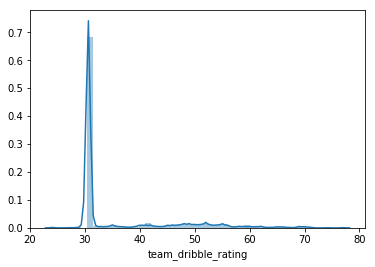

In [187]:
sns.distplot(soccer['team_dribble_rating'])

In [188]:
soccer.loc[(soccer['team_dribble_rating']!= mean_little_drib) &
           (soccer['team_dribble_scale']=='Little'),:]['team_dribble_rating'].value_counts()

32.0    268
33.0    202
29.0    106
31.0     74
24.0     72
30.0     60
27.0     38
28.0     34
Name: team_dribble_rating, dtype: int64

In [189]:
soccer['team_dribble_rating'].value_counts()

30.58    32792
52.00      798
48.00      668
55.00      640
49.00      604
50.00      550
51.00      536
47.00      468
53.00      456
54.00      454
40.00      442
41.00      440
46.00      432
35.00      424
42.00      396
56.00      392
45.00      380
32.00      268
58.00      258
43.00      254
62.00      242
36.00      230
34.00      218
60.00      212
69.00      208
44.00      208
59.00      202
33.00      202
70.00      186
61.00      184
37.00      182
39.00      178
65.00      176
66.00      140
57.00      140
71.00      110
29.00      106
38.00       94
67.00       92
31.00       74
24.00       72
64.00       72
63.00       72
30.00       60
27.00       38
77.00       38
74.00       36
68.00       36
28.00       34
Name: team_dribble_rating, dtype: int64

I'm ok with the imputation strategy for now.

## Hypothesis Testing #4 - Take 1

- Impact of team dribbling on win percentage. 
    - Null: Teams with dribbling rating of greater than 70 don’t have a statistically better winning percentage than teams with dribbling ratings less than 70. 
    - Alternative: Teams with dribbling rating of greater than 70 have a statistically better winning percentage than teams with dribbling ratings less than 70. 
    - **Two**-tail?
    - Alpha: 0.05


### More Data Exploration and Prep

Let's split the data intto those with dribbling rating > 70, and those teams without.

In [190]:
dribble_lots = soccer.loc[soccer['team_dribble_scale'].isin(['Lots']),:].copy()

In [191]:
dribble_lots.head()

country_name    league_name team_short_name team_long_name     season  \
1616        Italy  Italy Serie A             SAS       Sassuolo  2013/2014   
1617        Italy  Italy Serie A             SAS       Sassuolo  2013/2014   
1618        Italy  Italy Serie A             SAS       Sassuolo  2013/2014   
1619        Italy  Italy Serie A             SAS       Sassuolo  2013/2014   
1620        Italy  Italy Serie A             SAS       Sassuolo  2013/2014   

      stage           match_date  home_team_goal  away_team_goal  \
1616      4  2013-09-22 00:00:00               0               7   
1617      6  2013-09-29 00:00:00               2               2   
1618      8  2013-10-20 00:00:00               2               1   
1619     10  2013-10-30 00:00:00               1               2   
1620     13  2013-11-24 00:00:00               2               0   

      team_dribble_rating team_dribble_scale home_or_away  
1616                 71.0               Lots            H  
1617                 71.0               Lots            H  
1618                 71.0               Lots            H  
1619                 71.0               Lots            H  
1620                 71.0               Lots            H

In [261]:
dribble_nots = soccer.loc[~soccer['team_dribble_scale'].isin(['Lots']),:].copy()

In [262]:
dribble_nots.head()

country_name         league_name team_short_name team_long_name     season  \
0       Poland  Poland Ekstraklasa             CHO   Ruch Chorzów  2008/2009   
1       Poland  Poland Ekstraklasa             CHO   Ruch Chorzów  2008/2009   
2       Poland  Poland Ekstraklasa             CHO   Ruch Chorzów  2008/2009   
3       Poland  Poland Ekstraklasa             CHO   Ruch Chorzów  2008/2009   
4       Poland  Poland Ekstraklasa             CHO   Ruch Chorzów  2008/2009   

   stage           match_date  home_team_goal  away_team_goal  \
0      2  2008-08-16 00:00:00               2               1   
1      3  2008-08-22 00:00:00               2               1   
2      5  2008-09-12 00:00:00               2               0   
3      7  2008-09-27 00:00:00               0               0   
4      9  2008-10-19 00:00:00               2               0   

   team_dribble_rating team_dribble_scale home_or_away  
0                30.58             Little            H  
1                30.58             Little            H  
2                30.58             Little            H  
3                30.58             Little            H  
4                30.58             Little            H

Let's make sure we didn't lose any data.

In [263]:
print( '# of Lots set: ' + str(dribble_lots.shape[0])) 
print('# of Not set: {:,.0f}'.format(dribble_nots.shape[0])) 

# of Lots set: 706
# of Not set: 44,788


In [264]:
dribble_lots.shape[0]+dribble_not.shape[0]

45494

In [265]:
soccer.shape[0]

45494

Now we need to aggregate by team winning percentage. For simplicity we will aggregate overall winning percentage so we can aggregate to something that looks like:  

Team | Dribble Scales | Winning Pct
---|---|---
Team A | Lots | 45%
Team B | Normal | 45%


Create a `won` column that indicates whether team won or didn't win. To remain consistent with definitions we used in other tests we will define a `win` as when the team scores more goals that its opponent. Therefore, ties are not counted as wins.

In [266]:
# Lots
dribble_lots['won'] = 0
dribble_lots.loc[(dribble_lots['home_or_away'] == 'H') &
            (dribble_lots['home_team_goal'] > 
             dribble_lots['away_team_goal']), ['won']] = 1
dribble_lots.loc[(dribble_lots['home_or_away'] == 'A') &
            (dribble_lots['away_team_goal'] > 
             dribble_lots['home_team_goal']), ['won']] = 1

In [267]:
# Sniff test
dribble_lots[['home_or_away','home_team_goal','away_team_goal','won']].sample(10)

home_or_away  home_team_goal  away_team_goal  won
31071            A               3               0    0
31470            A               1               0    0
7533             H               2               2    0
25951            A               4               1    0
3215             H               0               3    0
31475            A               2               0    0
34710            A               1               1    0
38614            A               2               1    0
14536            H               3               0    1
36811            A               1               1    0

In [268]:
# nots
dribble_nots['won'] = 0
dribble_nots.loc[(dribble_nots['home_or_away'] == 'H') &
            (dribble_nots['home_team_goal'] > 
             dribble_nots['away_team_goal']), ['won']] = 1
dribble_nots.loc[(dribble_nots['home_or_away'] == 'A') &
            (dribble_nots['away_team_goal'] > 
             dribble_nots['home_team_goal']), ['won']] = 1

In [269]:
# Sniff test
dribble_nots[['home_or_away','home_team_goal','away_team_goal','won']].sample(10)

home_or_away  home_team_goal  away_team_goal  won
9969             H               4               3    1
28924            A               2               1    0
9567             H               0               0    0
5970             H               1               0    1
28524            A               0               2    1
2204             H               1               1    0
34297            A               1               5    1
36630            A               0               0    0
28025            A               1               1    0
35774            A               0               2    1

Great. Now we need to aggregate win percentage on team.

In [270]:
lots_win_pct = dribble_lots.groupby(['team_long_name']).agg(
    {'won': 'sum','team_long_name': 'count'}).rename(columns=
    {'won':'wins','team_long_name': 'matches'}).reset_index()

In [271]:
lots_win_pct['win_pct'] = lots_win_pct['wins']/lots_win_pct['matches']

In [282]:
lots_win_pct.sample(10)

team_long_name  wins  matches   win_pct
38          Genoa     2       11  0.181818
80      Sampdoria     2       12  0.166667
31      FC Nantes     7       21  0.333333
6        Atalanta     2       11  0.181818
64          Parma    12       27  0.444444
48  Korona Kielce    13       30  0.433333
55          Milan    21       47  0.446809
88        Udinese    11       27  0.407407
36     Fiorentina     4       12  0.333333
91  VfL Wolfsburg     9       16  0.562500

There appears to be a fair amount of teams with very few matches. Double check match counts of these teams exist in `dribble_lots`

In [283]:
dribble_lots[dribble_lots['team_long_name']=='FC Augsburg']

country_name            league_name team_short_name team_long_name  \
34245      Germany  Germany 1. Bundesliga             AUG    FC Augsburg   

          season  stage           match_date  home_team_goal  away_team_goal  \
34245  2013/2014     26  2014-03-22 00:00:00               1               1   

       team_dribble_rating team_dribble_scale home_or_away  won  
34245                 67.0               Lots            A    0

In [284]:
dribble_lots[dribble_lots['team_long_name']=='FC Paços de Ferreira']

country_name               league_name team_short_name  \
34702     Portugal  Portugal Liga ZON Sagres             FER   
34724     Portugal  Portugal Liga ZON Sagres             FER   

             team_long_name     season  stage           match_date  \
34702  FC Paços de Ferreira  2013/2014      7  2013-10-06 00:00:00   
34724  FC Paços de Ferreira  2014/2015     21  2015-02-14 00:00:00   

       home_team_goal  away_team_goal  team_dribble_rating team_dribble_scale  \
34702               2               1                 67.0               Lots   
34724               1               0                 67.0               Lots   

      home_or_away  won  
34702            A    0  
34724            A    0

Ok, seems legit. How many teams do we have? We might want to set a threshold because I think a team with a few matches might not be credible. 

In [285]:
lots_win_pct.shape[0]

23

100 teams. How many with, say, at least 10 matches?

In [286]:
lots_win_pct[lots_win_pct['matches']>=10].count()

team_long_name    23
wins              23
matches           23
win_pct           23
dtype: int64

23 teams. So, not great, but think it's ok. We'll be bootstrapping this anyway I think. So let's reduce down to teams >= 10 matches.

In [287]:
lots_win_pct = lots_win_pct[lots_win_pct['matches']>=10]
lots_win_pct.sample(5)

team_long_name  wins  matches   win_pct
50          Lazio    11       27  0.407407
15       Cagliari     1       11  0.090909
55          Milan    21       47  0.446809
64          Parma    12       27  0.444444
80      Sampdoria     2       12  0.166667

In [288]:
lots_win_pct.shape[0]

23

Now let's set up the `nots`.

In [289]:
nots_win_pct = dribble_not.groupby(['team_long_name']).agg(
    {'won': 'sum','team_long_name': 'count'}).rename(columns=
    {'won':'wins','team_long_name': 'matches'}).reset_index()

In [290]:
nots_win_pct['win_pct'] = nots_win_pct['wins']/nots_win_pct['matches']

In [291]:
nots_win_pct.sample(10)

team_long_name  wins  matches   win_pct
261                    Torino    27      108  0.250000
293         Zawisza Bydgoszcz    19       56  0.339286
5            AC Arles-Avignon     3       38  0.078947
237                 Sampdoria    73      218  0.334862
177                  OGC Nice    89      267  0.333333
197                 RAEC Mons    25       92  0.271739
294  Évian Thonon Gaillard FC    45      148  0.304054
123       Heart of Midlothian    84      230  0.365217
145             Korona Kielce    49      152  0.322368
210       Real Betis Balompié    45      154  0.292208

In [292]:
nots_win_pct = nots_win_pct[nots_win_pct['matches']>=10]
nots_win_pct.sample(5)

team_long_name  wins  matches   win_pct
103        Feirense     1       14  0.071429
85          FC Metz     7       36  0.194444
183      PEC Zwolle    36      105  0.342857
55   Crystal Palace    29       80  0.362500
139     KV Kortrijk    74      186  0.397849

In [293]:
nots_win_pct.shape[0]

283

#### Set up samples

The size of `Lots` data is dwarfed by the other rows. And this is before we aggregate the data to win percentage.
So I think we will need to bootstrap and produce samples of average win percentage.

In [315]:
sample_size = 100
samples = 1000

Let's do bootstrap samples for the `Lots` data set and the `Little,Normal` data set.

array([0.18181818, 0.2       , 0.44680851, 0.09090909, 0.43478261,
       0.5625    , 0.43478261, 0.40740741, 0.59090909, 0.34482759,
       0.2       , 0.44680851, 0.59090909, 0.16666667, 0.5625    ,
       0.34482759, 0.72727273, 0.25925926, 0.43333333, 0.44680851,
       0.59090909, 0.44680851, 0.33333333, 0.57777778, 0.34482759,
       0.72727273, 0.72727273, 0.16666667, 0.5       , 0.33333333,
       0.34482759, 0.18181818, 0.40740741, 0.2       , 0.57777778,
       0.16666667, 0.5       , 0.57777778, 0.40740741, 0.40740741,
       0.44680851, 0.57777778, 0.5625    , 0.16666667, 0.09090909,
       0.5       , 0.81818182, 0.5       , 0.34482759, 0.43478261,
       0.40740741, 0.40740741, 0.81818182, 0.18181818, 0.72727273,
       0.09090909, 0.72727273, 0.27272727, 0.34482759, 0.40740741,
       0.2       , 0.27272727, 0.72727273, 0.57777778, 0.2       ,
       0.59090909, 0.43478261, 0.5625    , 0.09090909, 0.33333333,
       0.40740741, 0.43333333, 0.18181818, 0.43333333, 0.72727

In [320]:
# Initialize lists to store sample means
means_lots = []
means_lit_norm = []

# Set seed
np.random.seed(1999)

# get 
for _ in range(samples):
    # Lots data
    sample_lots = np.random.choice(lots_win_pct['win_pct'], size=sample_size, replace=True)
    means_lots.append(np.mean(sample_lots))
    
    # Little, Normal data
    sample_lit_norm = np.random.choice(nots_win_pct['win_pct'], size=sample_size, replace=True)
    means_lit_norm.append(np.mean(sample_lit_norm))
#     print('mean of lots: {:.2f}'.format(np.mean(sample_lots)))
#     print('mean of nots: {:.2f}'.format(np.mean(sample_lit_norm)))


In [ ]:
# Check sizes
print('Size of means_lots: ' + str(len(means_lots)))
print(means_lots[:10])

In [324]:
# Check sizes
print('Size of means_lots: ' + str(len(means_lots)))
print(means_lots[:10])

print('Size of means_lit_norm: ' + str(len(means_lit_norm)))
print(means_lit_norm[:10])

Size of means_lots: 1000
[0.37134208884167413, 0.40099109165597724, 0.3895910373042578, 0.4027627803066015, 0.4332501808412364, 0.4212965588315879, 0.3779118173156061, 0.3899248031260536, 0.3876755296996891, 0.38893269593980145]
Size of means_lit_norm: 1000
[0.32602976957221247, 0.3274816510412192, 0.3241699905230168, 0.33060722392849734, 0.32372286710638565, 0.3314873939972029, 0.3484906760007548, 0.3398128854359298, 0.3194157687922816, 0.3421649559293328]


Visualize these distributions:

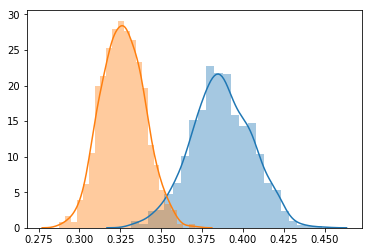

In [328]:
sns.distplot(means_lots)
sns.distplot(means_lit_norm)bbb

In [ ]:
# Check sizes
print('Size of means_lots: ' + str(len(means_lots)))
print(means_lots[:10])

In [329]:
import custom as cus

In [330]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

In [334]:
tttt = cus.twosample_tstatistic(experimental,control)

NameError: name 'np' is not defined